In [1]:
import pandas as pd
import numpy as np
import pickle
import time 

from sklearn import svm, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

In [2]:
file = "uscecchini28.csv"
df = pd.read_csv(file)

y = df['misstate']
print(y)
print(y[0])
y = label_binarize(y, classes=[0, 1])
print(y[0])
n_classes = y.shape[1]

x = df.iloc[:, 9:37]#.values


x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

print(x.shape, y.shape)

0         0
1         0
2         0
3         0
4         0
         ..
146040    0
146041    0
146042    0
146043    0
146044    0
Name: misstate, Length: 146045, dtype: int64
0
[0]
(146045, 28) (146045, 1)


In [3]:
totrain = False
if totrain:
    # Learn to predict each class against the other
    classifier = LogisticRegression(C=10)#, max_iter=1000)
    classifier.fit(x, y.ravel())
    # y_pred = classifier.fit(x, y).decision_function(X_test)


    with open('../models/logit.pkl', 'wb') as fid:
        pickle.dump(classifier, fid)
        print("Model saved.")
else:

    pkl_filename = "../models/logit.pkl"
    with open(pkl_filename, 'rb') as file:
        classifier = pickle.load(file)

In [4]:
y_pred = classifier.decision_function(x)[:, np.newaxis]
print(y_pred.shape)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 1
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_pred[:, i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(146045, 1)


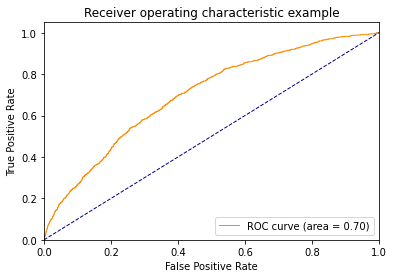

In [5]:
plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

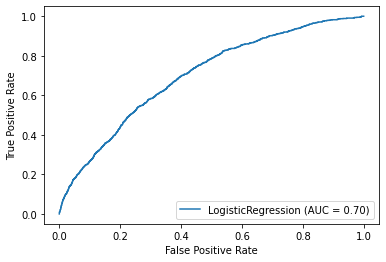

In [8]:
plot_roc_curve(classifier, x, y)
                         

Confusion matrix:
[[145081      0]
 [   962      2]]


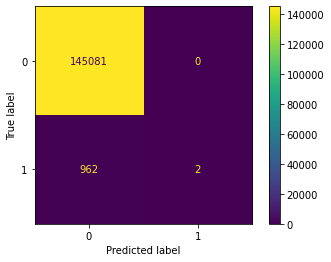

In [6]:
disp = metrics.plot_confusion_matrix(classifier, x, y)
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [7]:
file = "uscecchini28.csv"
df = pd.read_csv(file)

y = df['misstate']
print(y)
print(y[0])
y = label_binarize(y, classes=[0, 1])
print(y[0])
n_classes = y.shape[1]

x = df.iloc[:, 9:37]#.values

x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)


totrain = False
if totrain:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=1)
    clf.fit(x, y)

    with open('../models/svm.pkl', 'wb') as fid:
        pickle.dump(clf, fid)
        print("Model saved.")
else:

    pkl_filename = "../models/svm.pkl"
    with open(pkl_filename, 'rb') as file:
        clf = pickle.load(file)




0         0
1         0
2         0
3         0
4         0
         ..
146040    0
146041    0
146042    0
146043    0
146044    0
Name: misstate, Length: 146045, dtype: int64
0
[0]


In [8]:
y_pred = clf.decision_function(x)[:, np.newaxis]
print(y_pred.shape)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 1
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_pred[:, i])#, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(146045, 1)


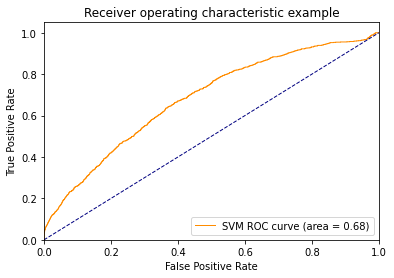

In [9]:
plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='SVM ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix:
[[145081      0]
 [   964      0]]


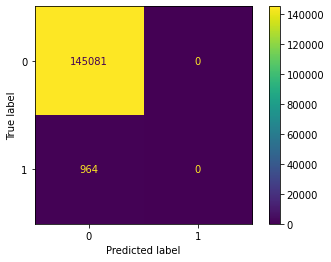

In [10]:
disp = metrics.plot_confusion_matrix(clf, x, y)
print("Confusion matrix:\n%s" % disp.confusion_matrix)

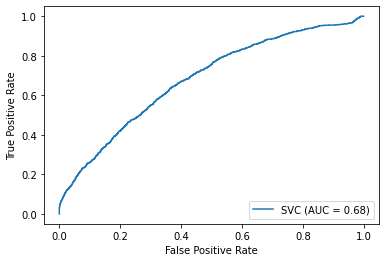

In [11]:
plot_roc_curve(clf, x, y)